<a href="https://colab.research.google.com/github/ssubbinn/ESAA/blob/main/15%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 군집화

### 1. K-평균 알고리즘 이해

K-평균 : 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다신 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행

- 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법

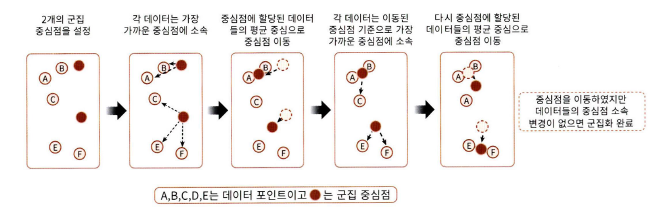

<K-평균의 장점>
- 일반적인 군집화에서 가장 많이 활용됨
- 알고리즘이 쉽고 간결

<K-평균의 단점>
- 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
- 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집을 선택해야 할지 가이드하기 어려움



### 사이킷런 KMeans 클래스 소개

In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, 
                             precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

# n_cluster = 군집화할 개수, 군집 중심점의 개수 의미
# int는 초기에 군집 중심점의 좌표를 설정할 방식, 일반적으로 k-means++방식으로 최초 설정
# max_iter는 최대 반복 횟수
# labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
# cluster_centers_ : 각 군집 중심점 좌표 [군집 개수, 피처 개수]

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
#Kmeans이용한 붓꽃 데이터 세트 군집화
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


iris=load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변형
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3) 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
#데이터 세트를 3개 그룹으로 군집화
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
# 군집화가 효과적으로 됐는지 확인
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


target 0,1 -> 잘 그루핑됨

target 2 -> 0번에 14개, 2번에 36개


In [5]:
#시각화
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


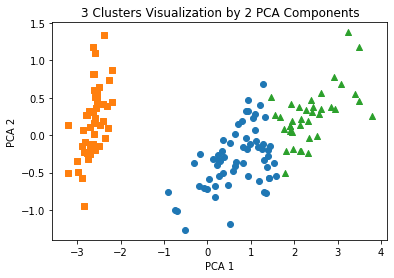

In [6]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 바커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

동그라미와 세모는 잘 분리가 안되있음

### 군집화 알고리즘 테스트를 위한 데이터 생성

여러 개의 클래스에 해당하는 데이터 세트 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성 가능

- make_blobs() : 개별 군집의 중심점과 표준 편차 제어 기능 추가
- make_classification() : 노이즈를 포함한 데이터를 만드는 데 유용하게 사용할 수 있음

- make_circle(), make_moon() : api 중심 기반의 군집화

<make_blobs() 호출 파라미터>

- n_samples : 생성할 총 데이터 개수, 디폴트는 100개
- n_features : 데이터 피처 개수. 첫번째 피처는 x, 두번째 피처는 y
- centers : int 값. 예를 들어 3으로 설정하면 군집의 개수. ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표 의미
- cluster_std : 생성될 군집 데이터의 표준편차

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [8]:
# 데이터 가공을 편리하게 하기 위해 데이터 세트를 dataframe으로 변경
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


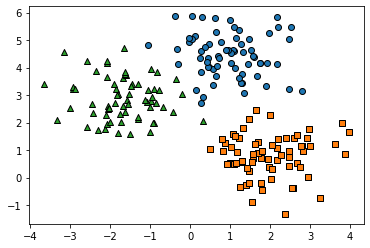

In [9]:
#시각화
target_list=np.unique(y)
#각 타깃별 산점도의 마커 값
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target=0, target=1, target=2 로 scatter plot을 marker 별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()

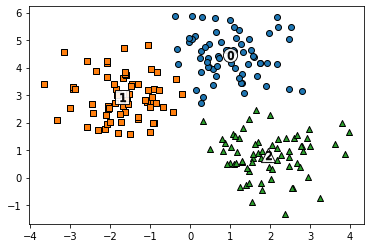

In [10]:
#KMeans 군집화 수행한 뒤에 군집별로 시각화
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', alpha=0.9, edgecolor='k', marker= '$%d$' % label)

plt.show()
  

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


cluster_std가 작을수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져 있음

### 군집 평가

- 대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않음

- 군집화는 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구

군집화가 효율적으로 잘 됐는지 평가 할 수 있는 지표?

[실루엣 분석]

: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 잘 분리됐다는 것 -> 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미

실루엣 계수 : 개별 데이터가 가지는 군집화 지표

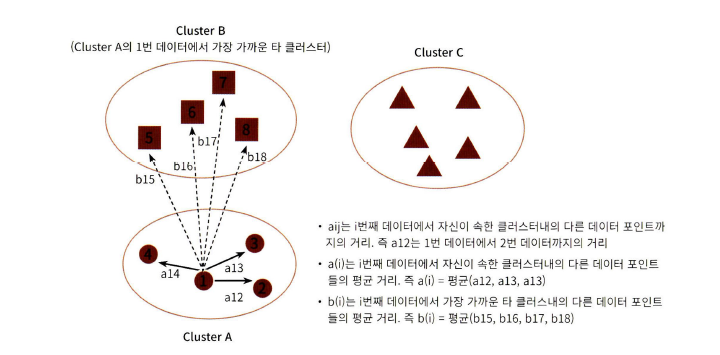

i 번째 데이터 포인트의 실루엣 계수 s(i)

- -1과 1사이 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것. 0에 가까울수록 근처의 군집과 가까워진다는 것. -값은 아예 다른 군집에 데이터 포인트가 할당


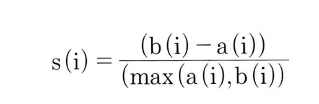


< 실루엣 분석을 위한 메서드 >

- sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds) : 각 데이터 포인트의 실루엣 계수 반환

- sklearn.metrics.silhouette_scores(X, labels, metric='euclidean', sample_size=None, **kwds) : 전체 데이터의 실루엣 계수 값을 평균해 반환. 일반적으로 이 값이 높으면 군집화가 어느 정도 잘 됐다고 판단

< 좋은 군집화의 조건 >

1. 전체 실루엣 계수의 평균값이 0~1사이의 값을 가지며, 1에 가까울수록 좋음

2. 개별 군집의 평균값의 편차가 크지 않아야 함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요



### 붓꽃 데이터 세트를 이용한 군집 평가

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

iris=load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [13]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

1번 군집은 실루엣 계수 평균 값이 0.79, 0번은 0.41, 2번은 0.45로 상대적으로 낮음

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

- 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수는 없음 -> 특정 군집의 실루엣 계수만 높고, 다른 군집은 낮아도 평균은 높을 수 있음

<여러 개의 군집 주어졌을 때 이를 분석한 도표를 참고해 평균 실루엣 계수로 군집 개수를 최적화하는 방법>

1.  군집 개수 2개 -> 실루엣 계수 0.704

- 하지만, 1번 군집은 평균 실루엣 계수 값 이상이지만, 2번 군집은 대부분 작음

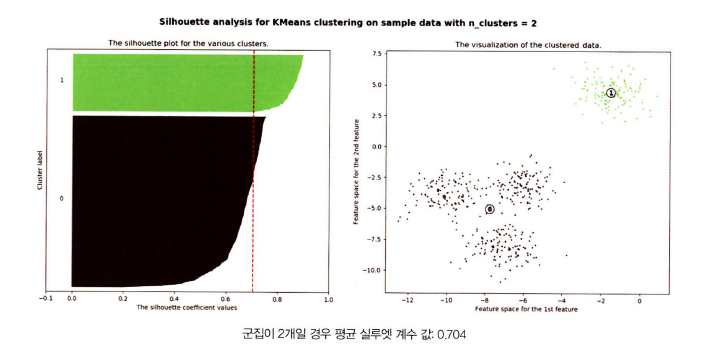

2. 군집 개수 3개 -> 실루엣 계수 0.588

- 1번, 2번 군집의 경우 실루엣 계수가 평균보다 높음
- 0번의 경우 모두 평균보다 낮음

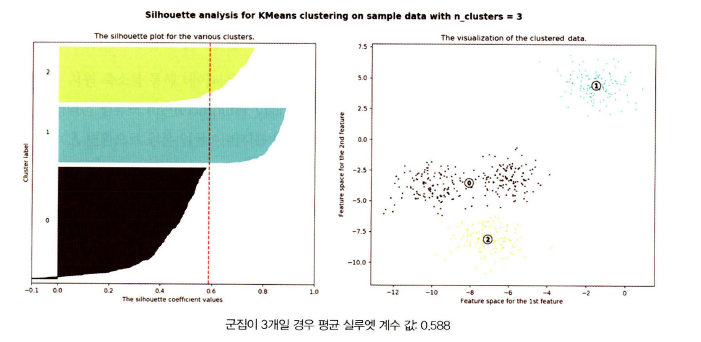

3. 군집이 4개인 경우 -> 실루엣 계수 값 0.65
- 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치
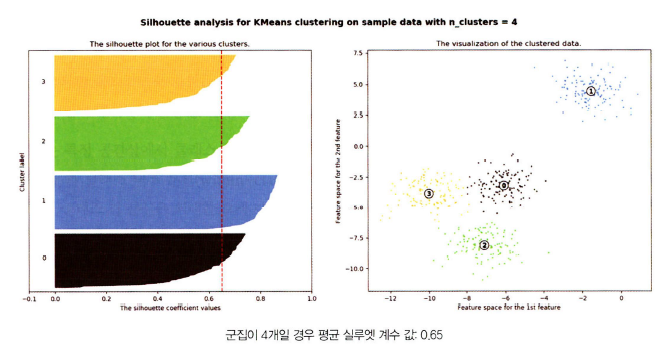

- 가장 이상적인 군집화 개수

In [14]:
# 시각화
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)


In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math  

In [18]:
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

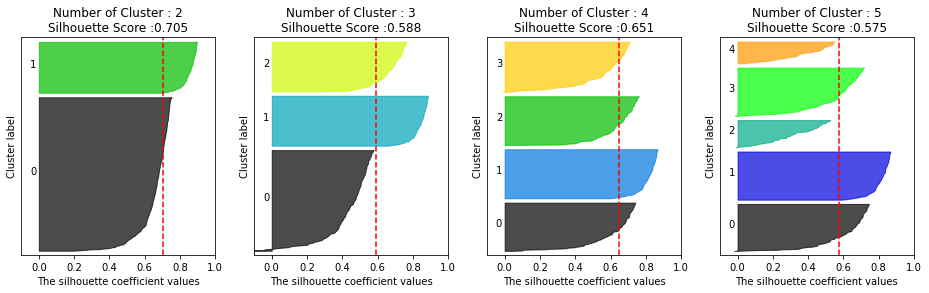

In [19]:
#군집 개수가 2개,3개,4개,5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)
#4개의 군집일 때 가장 최적

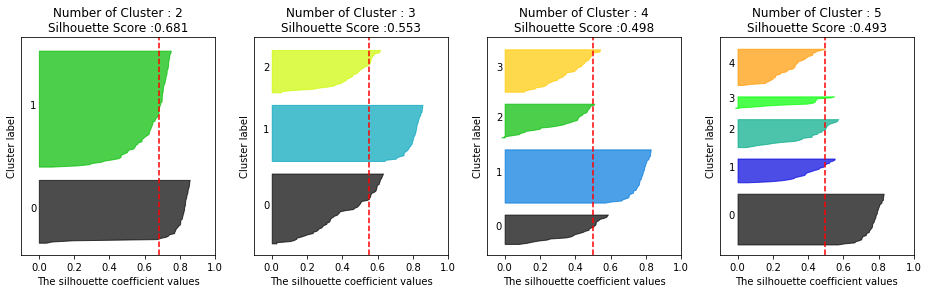

In [20]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)
# k-평균으로 군집화시 2개가 최적

### 평균 이동

[평균 이동의 개요]

평균 이동 : K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행. 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동

- 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 KDE( kernel density estimation )이용

- 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취함
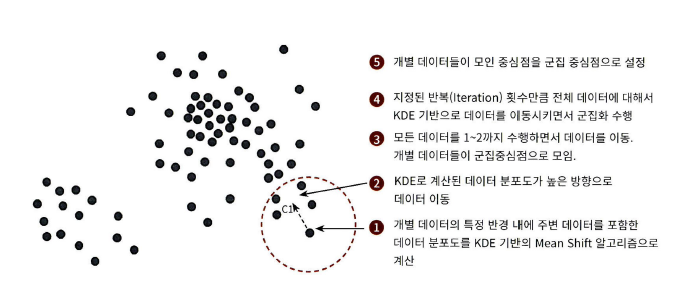

KDE : 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법

- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수 추정
- 대표적인 커널 함수 : 가우시안 분포 함수
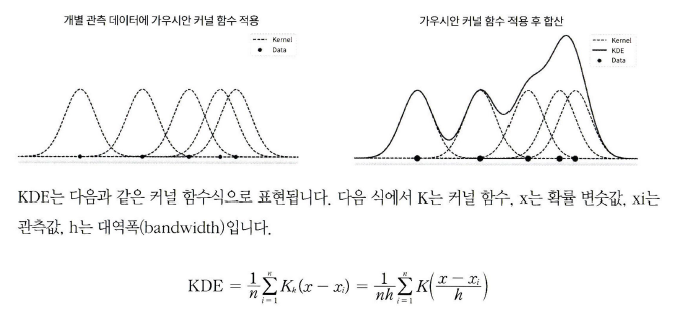

h : KDE 형태를 부드러운 형태로 평활화 하는데 적용. 성능 크게 좌우

h = 1.0 -> 변동성 큰 방식으로 과적합 쉬움
h = 10 -> 과도한 평활화로 과소적합 가능

- 보통 대역폭이 클수록 적은 수의 군집 중심점을 가짐

*MeanShift 클래스의 bandwidth가 h와 같은 역할

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y =make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))
# 군집 6개 -> 너무 세분화 됨

cluster labels 유형: [0 1 2 3 4 5]


In [22]:
#bandwidith 값을 작게해서 군집 개수 줄이기
meanshift=MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [23]:
#최적의 bandwidth 값 찾기
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [24]:
clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


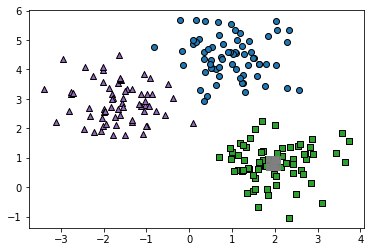

In [25]:
#시각화
clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  ceter_x_y=centers[label]
  
  #군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

  #군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,edgecolor='k',marker=''%label)

plt.show()

In [26]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())
#잘 매칭됨

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


### GMM

GMM 군집화 : 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(정규 분포)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식

모수추정 -> EM 방법 적용
- 개별 정규분포의 평균과 분산
- 각 데이터가 어떤 정규 분포에 해당되는지의 확률


In [27]:
#GMM을 이용한 붓꽃 데이터 세트 군집화
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀더 편리한 데이터 handlingㅇ을 위해 dataframe으로 변환
irisDF= pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

<주요 파라미터>
- n_components : gaussian mixture의 모델의 총개수

In [28]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

#군집화 결과를 irisDF의 'gmm_cluster' 칼럼 명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


In [29]:
#붓꽃 데이터 세트의 k-means 군집화수행 결과
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


- 붓꼿 세트가 GMM 군집화에 더 효과적! 특정 방식이 더 효과적이라는 것은 아님

### GMM과 K-평균의 비교

[KMeans]
- 원형의 범위에서 군집화 수행 (가장 잘)

만약 타원형이면?
-> make_blobs() 이용해서 데이터 변환

visualize_cluster_plot 이용하여 시각화
- clusterobj : 사이킷런의 군집 수행 객체. kmeans나 가우시안mixture의 fit()와 predict()로 군집화를 완료한 객체. 만약 군집화 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력
- dataframe : 피처 데이터 세트와 label값을 가진 DataFrame
- label_name : 군집화 결과 시각화일 경우 dataframe 내의 군집화 label 칼럼명. make_blobs() 결과 시각화일 경우는 dataframe내의 target 칼럼명
- iscenter : 사이킷런 Cluster 객체가 군집 중심 좌표를 제공하면 True, 그렇지 않으면 false

In [30]:
#함수 정의
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

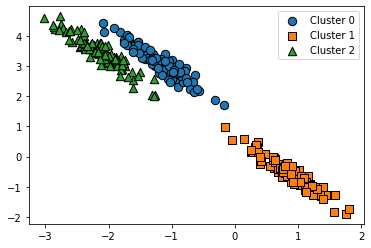

In [31]:
#시각화
from sklearn.datasets import make_blobs

#make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation=[[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)
#feature 데이터 세트와 make_blobs()의 y결과값을 DataFrame으로 저장
clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y

#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

-> 군집화 정확성 떨어짐

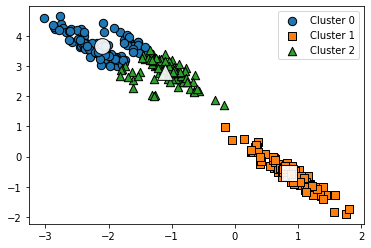

In [32]:
#3개의 군집 기반 Kmeans를 X_aniso데이터 세트에 적용
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)
#kmeans로 군집화시 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음

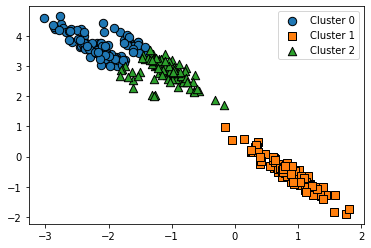

In [33]:
#GMM으로 군집화
#3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm=GaussianMixture(n_components=3,random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

#GaussianMixture은 cluster_centers_속성이 없으므로 iscenter을 false로 설정
visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=False)

-> 데이터가 분포된 방향에 따라 정확하게 군집화

In [34]:
#군집화 효율 차이 시각화
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gausian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gausian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- kmeans의 경우 군집 1번만 정확히 매핑.나머지 군집의 경우 target 값과 어긋나는 경우가 발생
- gmm은 군집이 target값과 잘 매핑. 시간이 오래 걸리는게 단점

### DBSCAN

특정 공간 내에 데이터 밀동 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행

<주요 파라미터>

- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역

- 최소 데이터 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

- 핵심 포인트(Core Point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 함

- 이웃 포인트(Neighbor Point) : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함

- 경계 포인트(Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 함

- 잡음 포인트(Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 함

- eps : 입실론 주변 영역의 반경을 의미

- min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미 (min points +1)

### DBSCAN 적용하기 - 붓꽃 데이터 세트


In [35]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀더 편리한 데이터 handlingㅇ을 위해 dataframe으로 변환
irisDF= pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target']=iris.target

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- 군집 레이블이 -1인 것은 노이즈에 속하는 군집 의미

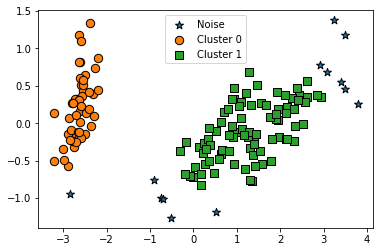

In [37]:
#군집화 데이터 세트를 2차원 평면에서 표현하기 위해 PCA를 이용해 2개의 피처로 압축 변환
#그 이후 시각화

from sklearn.decomposition import PCA
#2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca=PCA(n_components=2, random_state=0)
pca_transformed=pca.fit_transform(iris.data)
#visualize_cluster_2d() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- PCA로 2차원으로 표현시 이상치인 노이즈 데이터가 명확히 드러남
- 특정 군집 개수로 군집을 강제하지 않는 것이 좋음
- eps 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 데이터 개수가 작아짐
- min_samples를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함시켜야 하므로 노이즈 데이터 개수가 커지게 됨

### DBSCAN 적용하기 - make_circles() 데이터 세트

- make_circles() 함수는 오직 2개의 피처만을 생성
- noise는 노이즈 세트의 비율, factor는 외부 원과 내부 원의 scale 비율

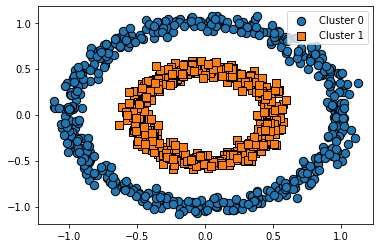

In [39]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

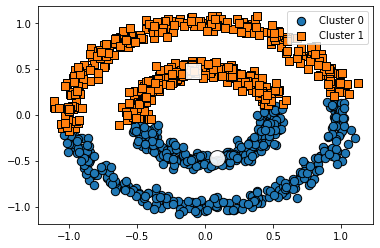

In [41]:
#KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

거리 기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움

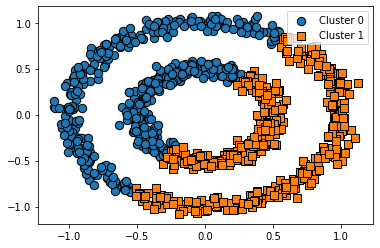

In [42]:
#GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

내부와 외부의 원형으로 구성된 더 복잡한 형태의 데이터 세트에서는 군집화가 원하는 방향으로 되지 않음

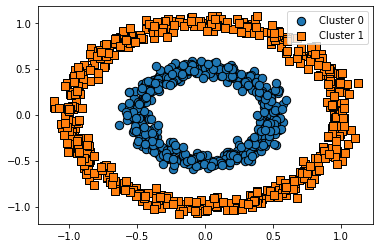

In [43]:
#DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

정확히 군집화 됨